Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes
details like credit history, loan amount, their income, dependents etc.
Dataset Link- https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Data type of columns 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
# For checking dataset diemensions 
df.shape 

(614, 13)

In [5]:
# Summarizing the distribution of the numerical variables.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Cleaning miussing value

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

fill missing values for categorical variables and Numerical columns 

In [8]:
# Fill missing values with the mode for categorical(not more unique value) columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [9]:
# Fill missing values with the median for 'LoanAmount'
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
# we are using impute missing values with the median (middle value) since it's more robust to outliers than the mean. 

In [10]:
# recheck the null value
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df['Loan_ID'].nunique()

614

In [12]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

There is more difference between Male and Female Gender .  

In [13]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [14]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Encoding Categorical Features columns

In [21]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Dependents']:
    df[i] = le.fit_transform(df[i])

In [22]:
# Identify categorical columns 
include_columns=['Property_Area','Self_Employed','Education','Married','Gender']
# Apply one-hot encoding to all include_columns
df = pd.get_dummies(df, columns=include_columns, drop_first=True)

In [23]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,0,0,0,1,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,0,0,0,1


In [24]:
df.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_Yes',
       'Education_Not Graduate', 'Married_Yes', 'Gender_Male'],
      dtype='object')

In [25]:
numerical_columns=['Dependents', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History','Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_Yes','Education_Not Graduate', 'Married_Yes', 'Gender_Male']

Data Visualization

1. Using Univariate Plots

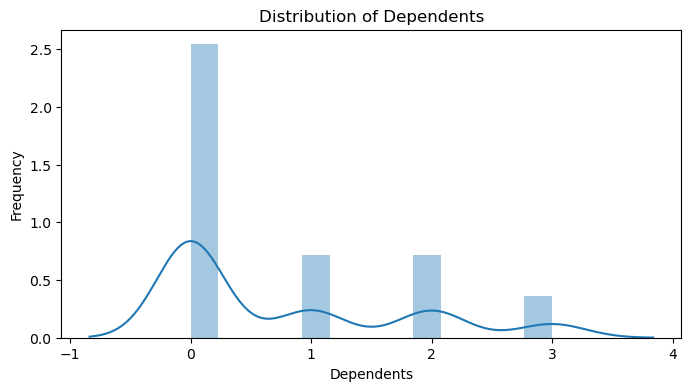

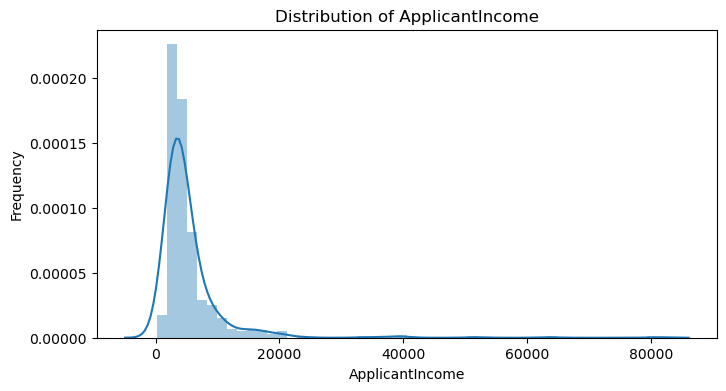

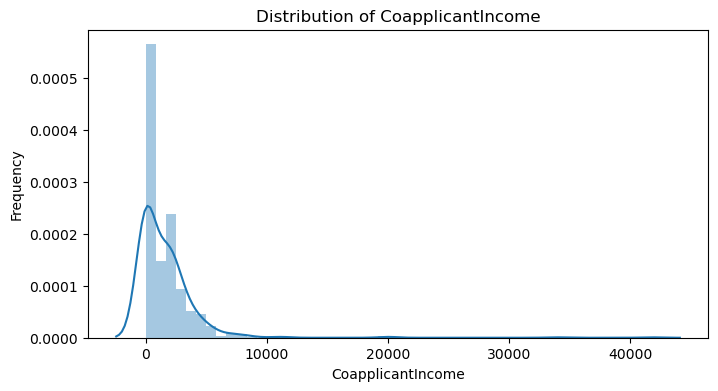

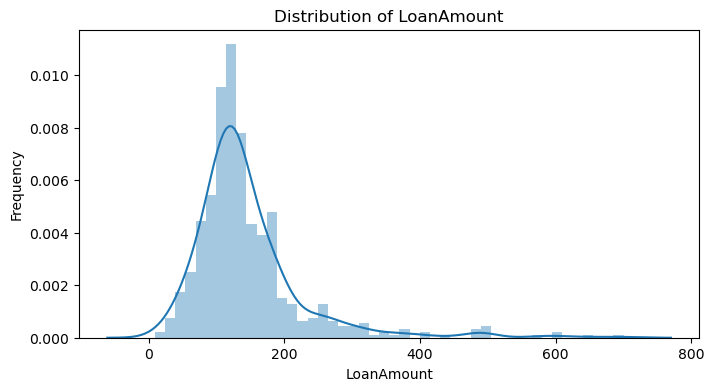

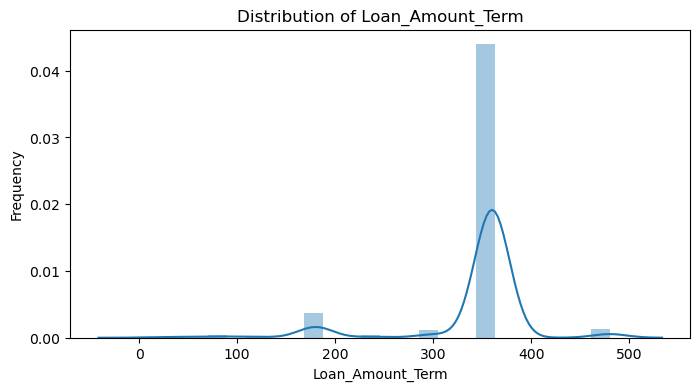

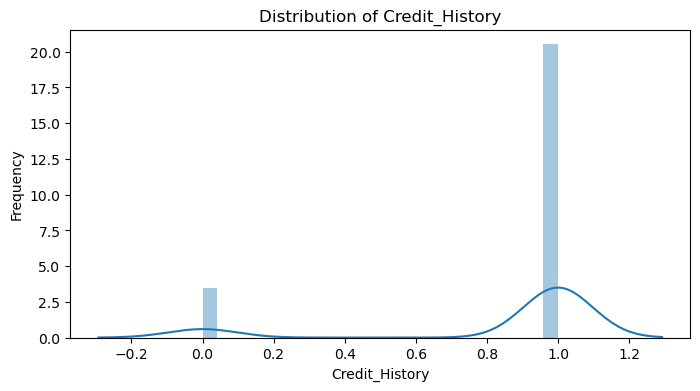

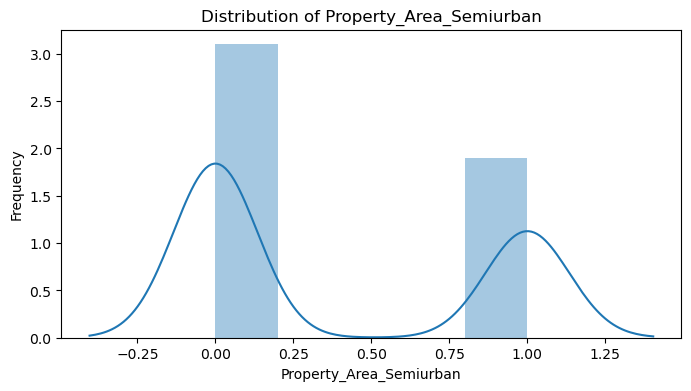

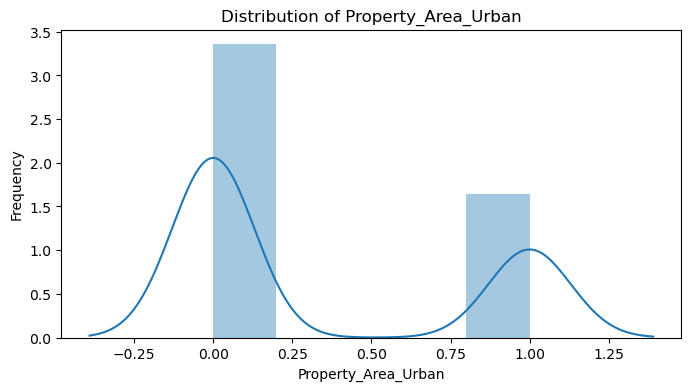

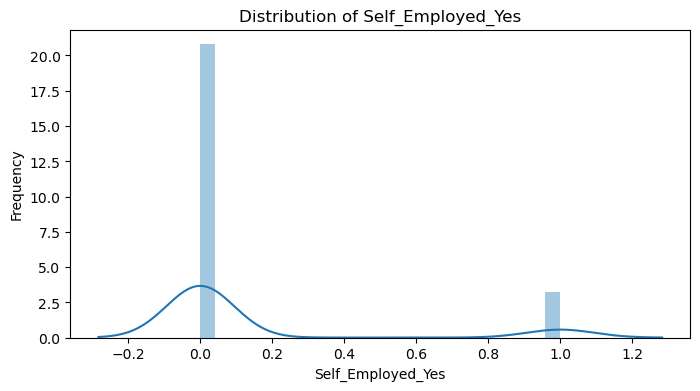

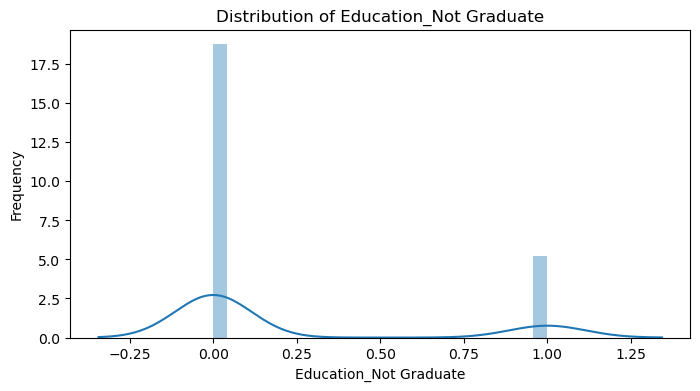

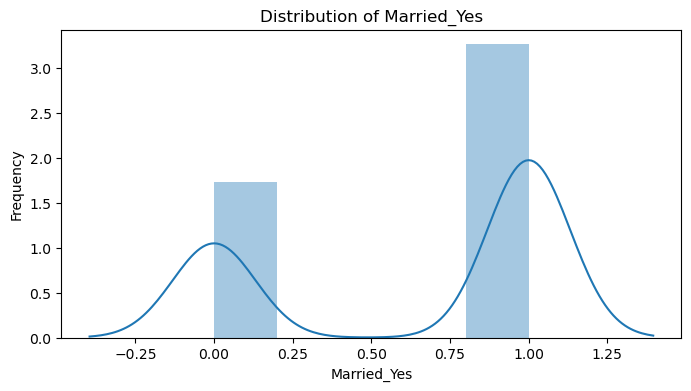

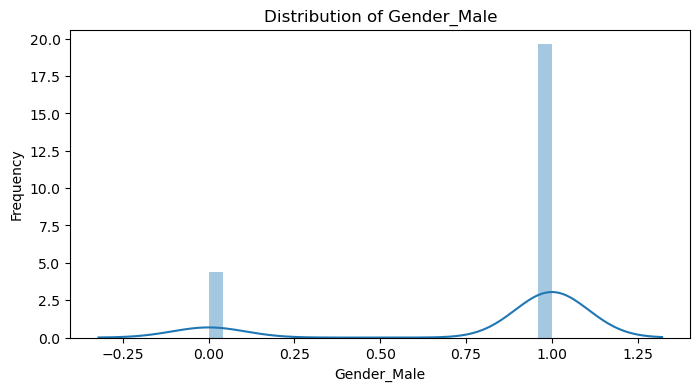

In [26]:
# Create univariate plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  
    sns.distplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

2.Using Multivariate Plots

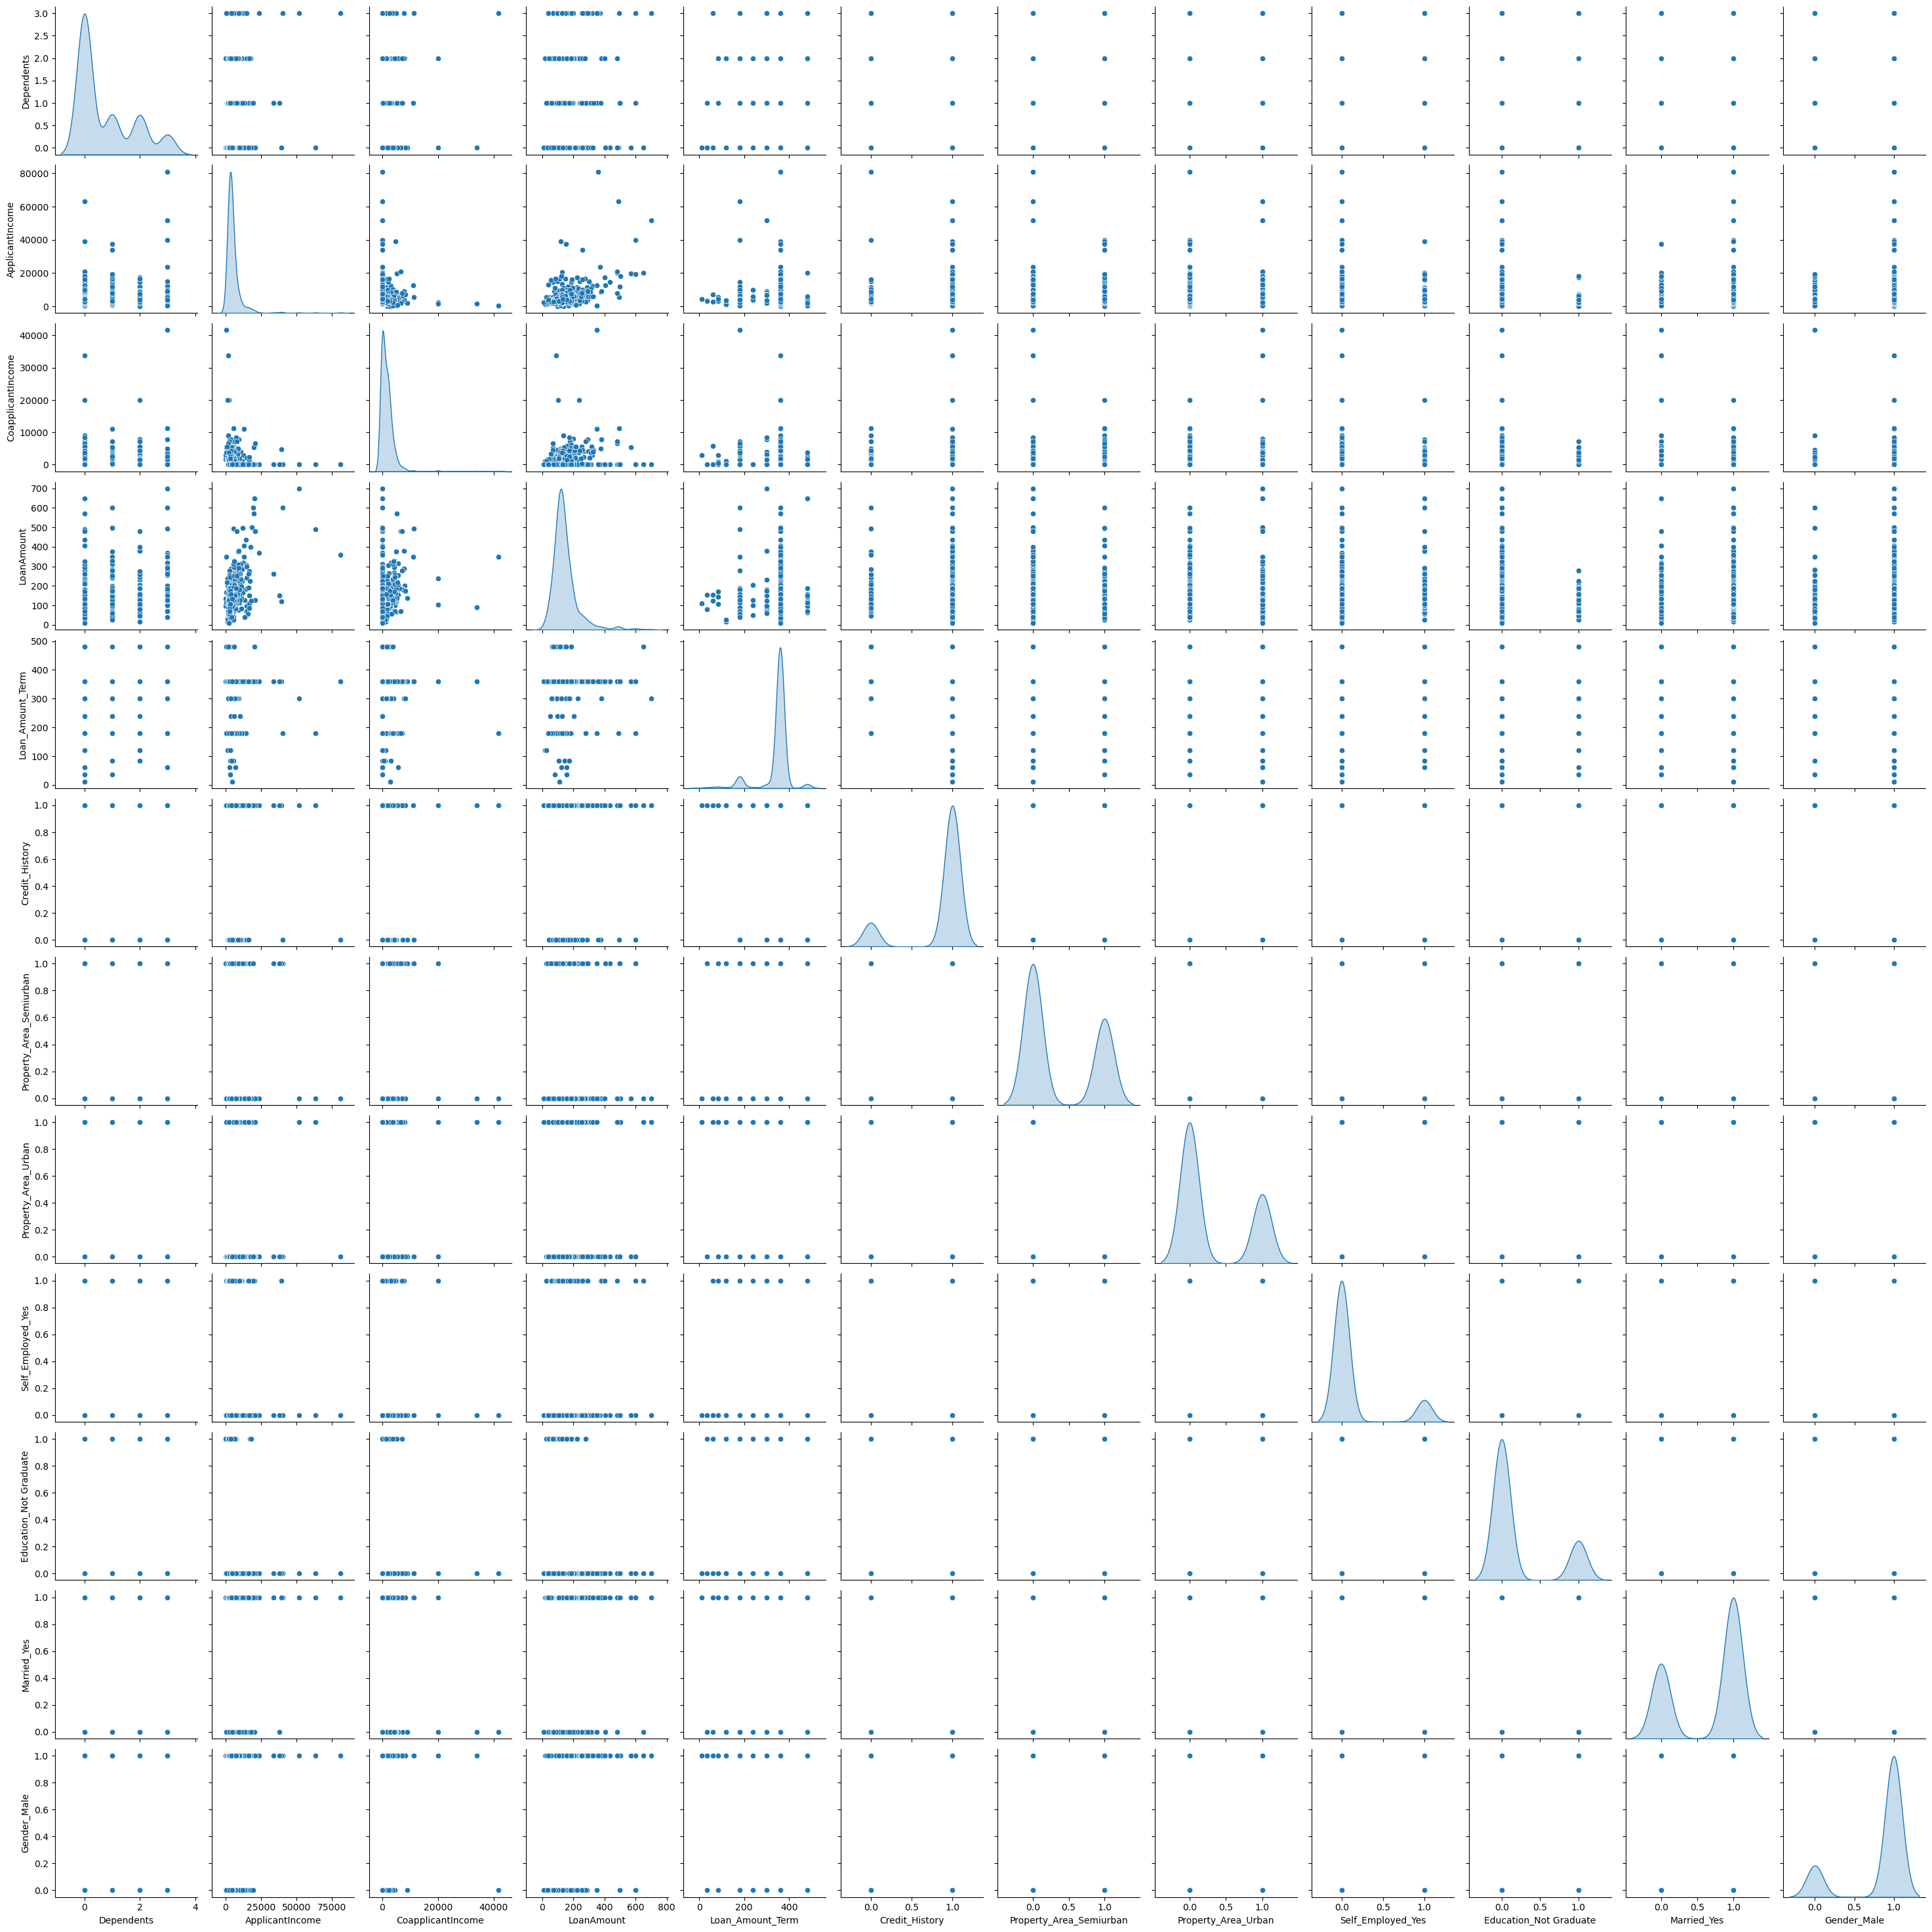

In [27]:
# Pairplot for pairwise relationships between numeric features
sns.pairplot(df , diag_kind='kde')
plt.show()

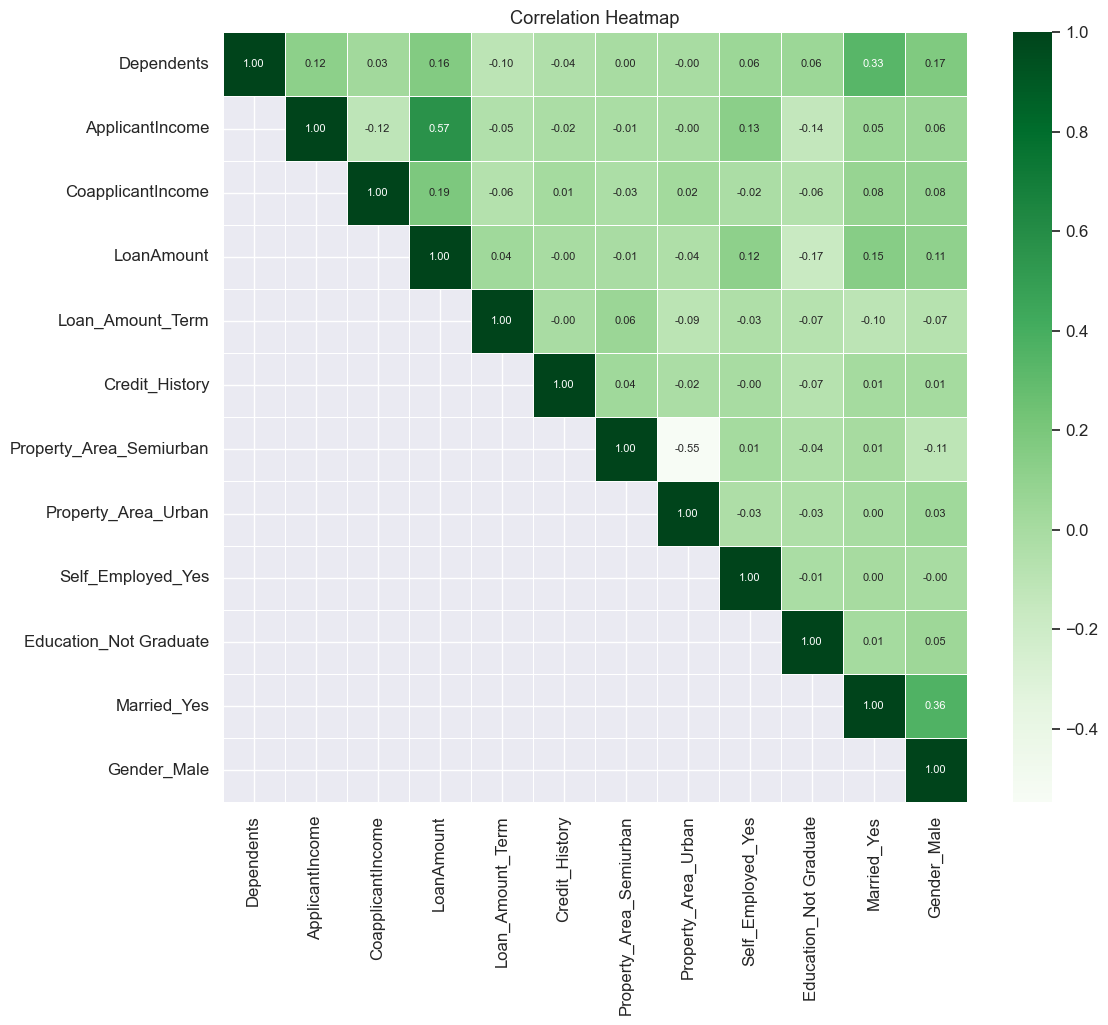

In [28]:
# Heatmap to visualize correlations between features
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()

correlation value of  features columns are in the range.

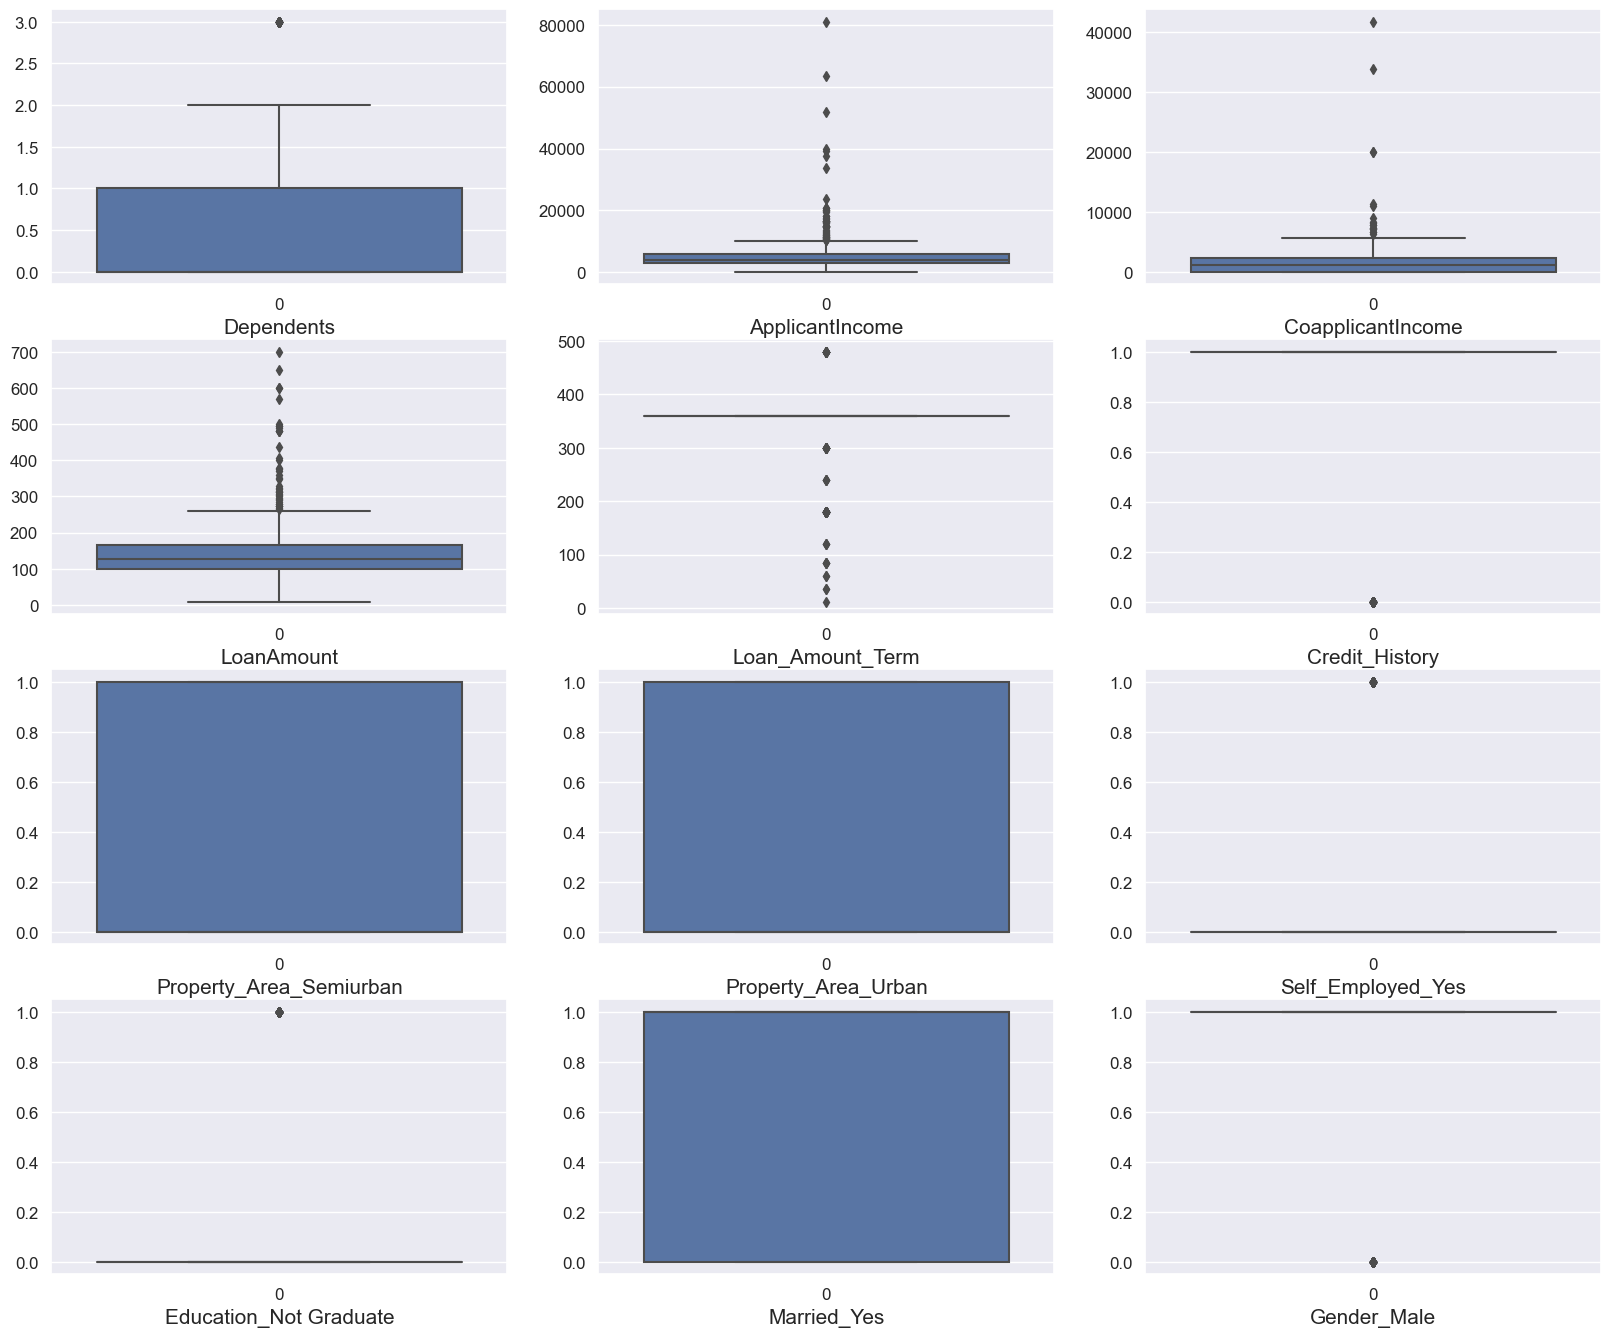

In [29]:
# Boxplots to visualize the distribution of numeric feature
plt.figure(figsize =(20,25))
graph = 1

for column in numerical_columns:
    plt.subplot(6,3,graph)
    ax=sns.boxplot(data=df[column])
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

Loan amount and Income of applicant have outliers .But it show the some uniquness in loan prediction.
Also the size of data is also less . so we keep same dataset .

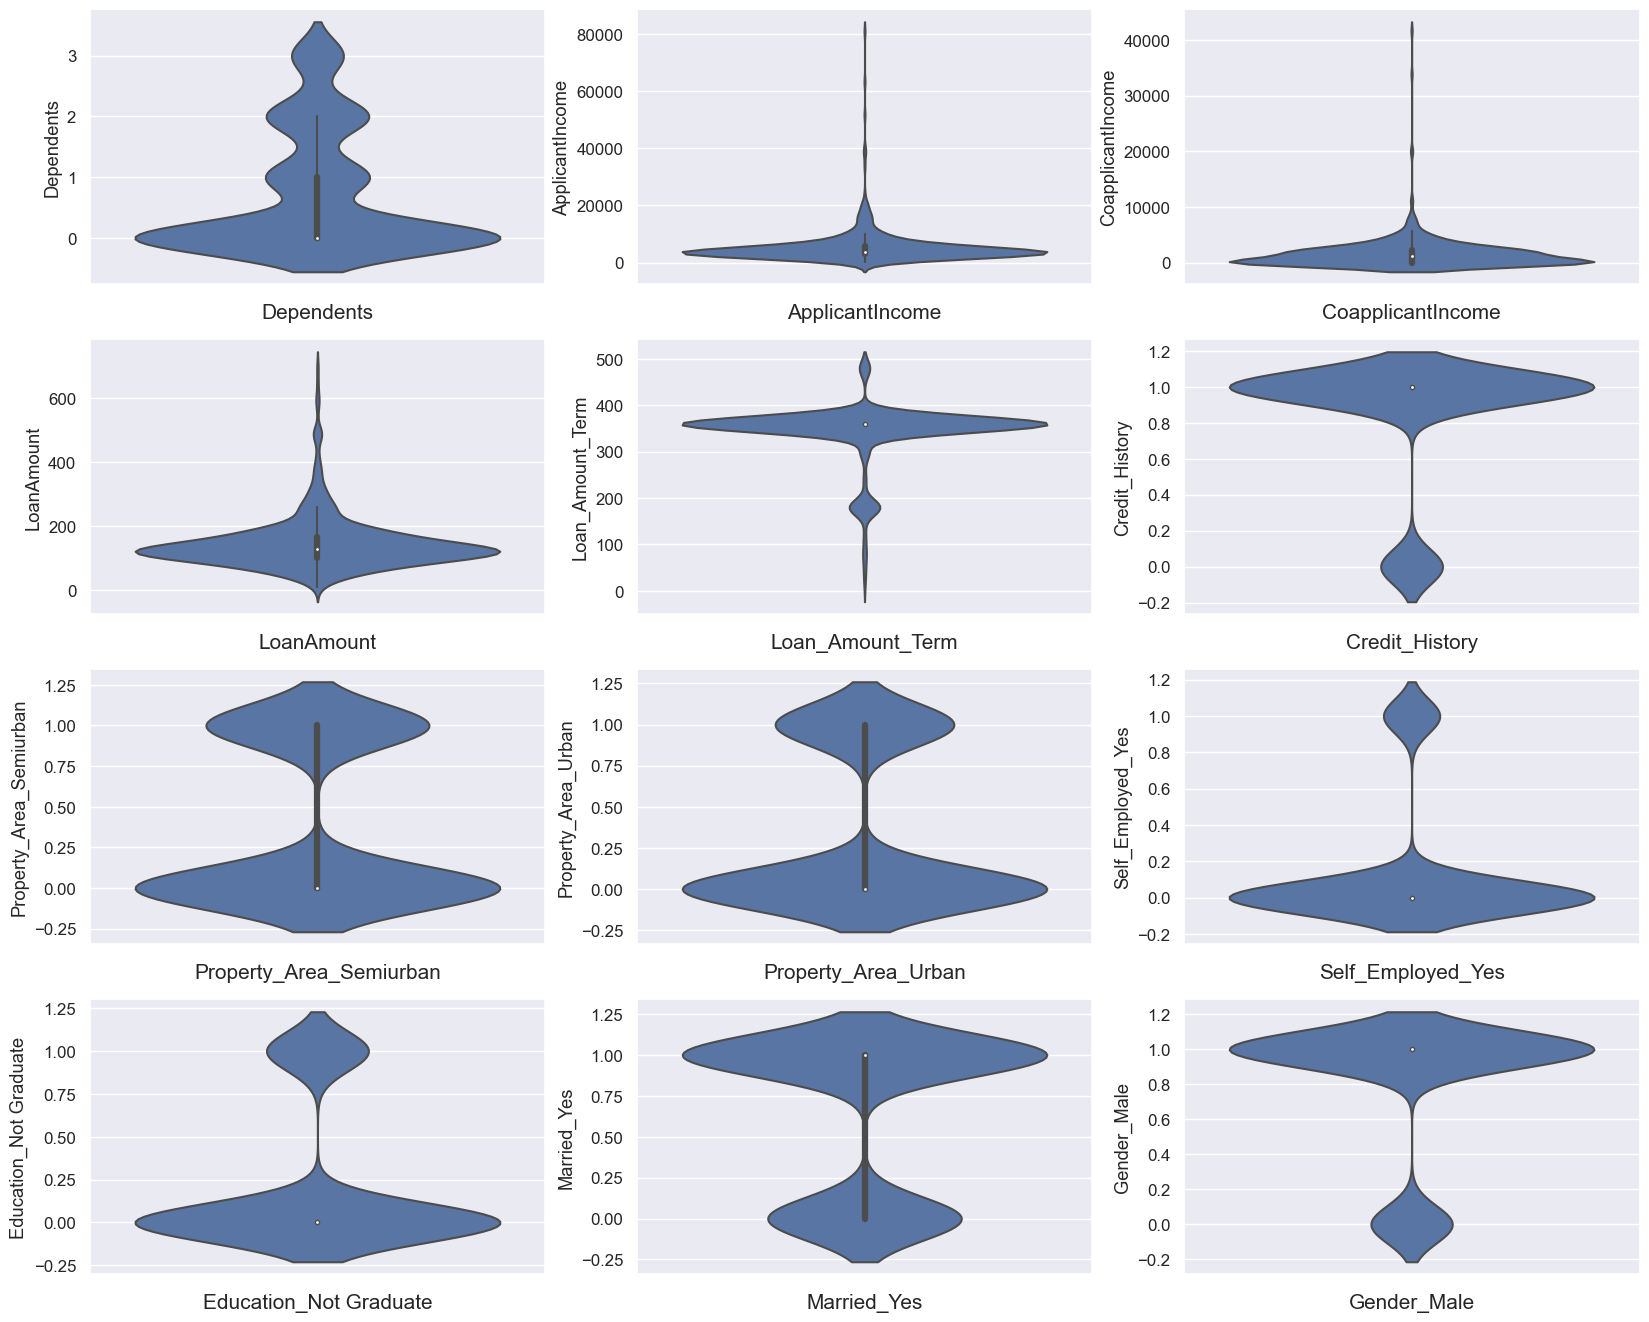

In [30]:
plt.figure(figsize =(20,25))
graph = 1

for column in numerical_columns:
    plt.subplot(6,3,graph)
    ax=sns.violinplot(data=df, y=column)
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

skewness removal

In [31]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
Dependents                 1.015551
ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Self_Employed_Yes          2.159796
Education_Not Graduate     1.367622
Married_Yes               -0.644850
Gender_Male               -1.648795
dtype: float64


ApplicantIncome,CoapplicantIncome have skewness above 5 Highly skewed, so we apply the boxcox and sqrt on columns.

In [32]:
# Define a threshold for skewness (e.g., 1.9) above which you consider a column as skewed
skew_threshold = 1.9

skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()

# Apply skewness correction to the skewed columns using a transformation like the Box-Cox method
for col in skewed_columns:
    # Check for negative values (Box-Cox requires all values to be positive)
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])  # Log transformation
    else:
        df[col] = df[col] ** 0.5  # Square root transformation

Normalization of data

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to normalize (numerical columns)
numerical_columns=['Dependents', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History','Property_Area_Semiurban', 
                   'Property_Area_Urban', 'Self_Employed_Yes','Education_Not Graduate', 'Married_Yes', 'Gender_Male']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



Model Development

Classification Task

In [35]:
# divide dataset into feature and label column.
X = df.drop(['Loan_Status','Loan_ID'], axis =1)
Y = df["Loan_Status"]

Testing Candidate models

In [36]:
#Importing Machine learning Model library
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_curve

Splitting Data into train test

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=59)

Classification Algorithms

Logistics Regression

In [38]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Logistics Regression
Accuracy Score : 0.7945945945945946
Confusion matrix : [[ 21  37]
 [  1 126]]


Decision Tree Classifier

In [39]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Decision Tree Classifier
Accuracy Score : 0.6972972972972973


Random Forest Classifier

In [40]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)
print('Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accu = accuracy_score(Y_test, y_pred)

Random Forest Classifier
Accuracy Score : 0.7891891891891892


AdaBoost Classifier

In [41]:
Abc=AdaBoostClassifier()
Abc.fit(X_train,Y_train)
y_pred=Abc.predict(X_test)
print('AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

AdaBoost Classifier
Accuracy Score : 0.8


Support Vector Machine Classifier

In [42]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Support Vector Machine Classifier
Accuracy Score : 0.7945945945945946


Bagging Classifier

In [43]:
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
y_pred = BC.predict(X_test)
print('Bagging Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accub = accuracy_score(Y_test, y_pred)

Bagging Classifier
Accuracy Score : 0.7351351351351352


AdaBoost Classifier gives highest Accuracy Score : 0.8 .

Cross Validation Score

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
# cross validation score for random forest classifier
# By default CV=5 and Scoring parameter is accuracy 

score= cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.78861789 0.77235772 0.77235772 0.82113821 0.80327869]
0.7915500466480075
Difference between accuracy score and cross validation score is - -0.0023608574588183107


In [46]:
# cross validation score for Support Vector Machine Classifier
score= cross_val_score(svc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
0.809462881514061
Difference between accuracy score and cross validation score is - -0.07432774637892581


In [47]:
# cross validation score for AdaBoost Classifier
score= cross_val_score(Abc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.82113821 0.77235772 0.78861789 0.81300813 0.7704918 ]
0.79312275089964
Difference between accuracy score and cross validation score is - -0.05798761576450484


In [48]:
# cross validation score forLogistics Regression
score= cross_val_score(log_reg,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
0.809462881514061
Difference between accuracy score and cross validation score is - -0.07432774637892581


In [49]:
# cross validation score for Bagging Classifier
score= cross_val_score(BC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.82113821 0.65853659 0.77235772 0.80487805 0.75409836]
0.7622017859522857
Difference between accuracy score and cross validation score is - -0.02706665081715054


The minimum Difference between accuracy score and cross validation score is - -0.0023 for random forest classifier.

Hyperparameter tuning and Performance of model

In [52]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier



# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=39)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]                 # Whether or not to use bootstrap samples
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=39, n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rf_classifier = random_search.best_estimator_
accuracy = best_rf_classifier.score(X_test, Y_test)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Accuracy on Test Set: 0.7886178861788617


Final Model

In [53]:
best_hyperparameters = random_search.best_params_

In [54]:
Final_model = RandomForestClassifier(**best_hyperparameters, random_state=39)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('Final Model Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
print('classification Report :',classification_report(Y_test, y_pred))

Final Model Random Forest Classifier
Accuracy Score : 0.7886178861788617
Confusion matrix : [[18 25]
 [ 1 79]]
classification Report :               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Saving model

In [55]:
import joblib 
joblib.dump(Final_model,'Loan Application Status Prediction.pkl')

['Loan Application Status Prediction.pkl']

Predicting the Final Model

In [56]:
prediction = Final_model.predict(X_test)

In [57]:
Actual = np.array(Y_test)
df_pred = pd.DataFrame()
df_pred["Predicted Loan_Status"] = prediction
df_pred["Actual Loan_Status"] = Actual
df_pred.head(10)

,Predicted Loan_Status,Actual Loan_Status
0,Y,Y
1,Y,Y
2,Y,Y
3,Y,Y
4,Y,Y
5,Y,Y
6,Y,Y
7,Y,Y
8,Y,N
9,Y,N


Model prediction is good, it can predict Loan Status of application .